<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование данных о российском кинопрокате

Рассматривается набор данных Министерства культуры Российской Федерации. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Цель работы - изучение рынка российского кинопроката.

## Описание даных
Таблица `mkrf_movies`:
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма (без учета гос. поддержки);
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Таблица `mkrf_shows`:
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

## Изучение данных из файла

### Объединение таблиц

Импортируем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Рассмотрим датасеты:

In [2]:
data_main = pd.read_csv("mkrf_movies.csv")
data_main.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
data_box_office = pd.read_csv("mkrf_shows.csv")
data_box_office.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Для удобства объединим эти две таблицы, но для начала рассмотрим сколько номерова прокатных удостоверений имеет каждая из таблиц и сколько из них совпадает:

In [4]:
print(data_main["puNumber"].unique().size)
print(data_box_office["puNumber"].unique().size)

7484
3158


In [5]:
len(set(data_box_office["puNumber"].unique().tolist()) & set(data_main["puNumber"].unique().tolist()))

0

Можно заметить, что в `data_main` гораздо больше номеров, однако это не означает, что в таблице `data_box_office` содержится информация о меньшем количестве фильмов. Можно заметить, что одни и те же фильмы из `data_main` имеют разные номера прокатных удостоверений. Возможно некоторые из них перерегистрировались с течением времени.
Также анализ показал, что `data_main` и `data_box_office` не содержат одинаковых фильмов, что странно. Чтобы выяснить причину возникновения такого результата изучим данные более подробно.

In [6]:
data_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В `data_main` данные об номерах удостоверений представлены в формате строк, а в `data_box_office`в числовом. Исправим это и вновь посмотрим совпадения.

Скорее такой тип данных возник из-за того, что пропуски данных заполнялись каким-то строковым значением. Отсеим такие строки.

Все удостоверения имеют длину в 9 символов. Выделим строки, отличные от этой длины:

In [8]:
data_main.loc[data_main["puNumber"].apply(lambda x: len(x)) != 9 ]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4701,1001 рецепт влюбленного кулинара,1811096,2010-12-23T12:00:00.000Z,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия"


Можно сделать вывод, что не все удостоверения имеют номер длиной в 9 символов и что искомая строка - `нет`.

Удалим эту строку:

In [9]:
data_main.drop(1797, inplace = True)

Преобразуем тип:

In [10]:
data_main["puNumber"] = data_main["puNumber"].astype("int64")

Теперь рассмотрим пересечения:

In [11]:
len(set(data_box_office["puNumber"].unique().tolist()) & set(data_main["puNumber"].unique().tolist()))

3158

Все данные из `data_box_office` присутствуют в `data_main`. Объединим эти две таблицы:

In [12]:
data = data_main.merge(data_box_office, on = "puNumber", how = "left")

In [13]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


"Левое" объединение выбрано не случайно `data_main` - основная таблица и при объединении надо сохранить все данные в ней и не добавить лишних.

Выше предполагалось, что одинаковые фильмы имеют разный номер удостоверения, поэтому может быть при удалении всех строк с неизвестным `box_office` потеряется не слишком много данных. Проверим это:

In [14]:
print(data.dropna(subset = "box_office").shape)
print(data.groupby("title").agg("first").shape)

(3158, 16)
(6771, 15)


Становится очевидно, что потеряется большое количество данных. Поэтому оставим данные с пропусками в столбце `box_office`, они пригодятся при дальнейшем исследовании.

### Обзор данных

Рассмотрим информацию об итоговой таблице:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В некоторых столбцах есть пропущенные значения.

В столбцах `film_studio`, `production_country`, `producer` они могут отсуствовать из-за каких-либо ошибок при сборе данных. Пропущенные значения в этих столбцах можно заменить на "неизвестно". Это не сильно повредит при дальнейшем исследовании.

Пропущенные значения в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` означают, что фильмы не получали поддержки со стороны государства. Оставим значения этих столбцов пропущенными
`budget`.

В столбце `genres` значения могут отсутствовать из-за того, что фильм не имеет какого-то определьенного жанра или из-за каких-либо ошибок при сборе данных. Заменим пропущенные значения на "неизвестно".

Пропуски в `ratings` могут быть обусловлены тем, что фильм непопулярен и не имеет достаточного количества оценок. Значения в этом столбце можно оставить пропущенными.

Во многих столбцах отсутствуют значения `box_office`. Этот параметр один из ключевых в исследовании, поэтому его нельзя заполнять простыми методами (например медианой или средним), в то же время, если отбросить строки с пропусками, останется меньше половины данных. При дальнейшем исследовании будем использовать строки с пропусками для подтверждения гипотез, которые не связаны с параметром `box_office`.

Большинство столбцов в таблице - перечисление людей, жанров и т.д. Для более удобного анализа можно заменить значения в этих столбцах на массивы, содержащие перечисленные объекты.

Тип некоторых столбцов следует изменить для удобства работы и оптимизации хранения. В `show_start_date` следует использовать datetime. Также тип столбцов `age_restriction`, `type` можно изменить на категориальный. Значения `ratings` лучше изменить на числовой тип.

Проверим таблицу на налицие дубликатов:

In [16]:
data.duplicated().sum()

0

Явные дубликаты в данных отсутствуют.

Рассмотрим некоторые столбцы более подробно для выявления неявных дубликатов или иных аномалий:

Далее будут представлены только столбцы, в которых нашлись какие-либо аномалии.

In [17]:
data["type"].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Столбец `type` содержит неявные дубликаты из-за того, что в каком-то месте (или нескольких местах) перед 'Художественный' по ошибке был поставлен пробел. Это необходимо будет исправить при дальнейшей предобработке.

In [18]:
data["production_country"].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Данные заполнены не в едином стиле. Меняется порядок старн: 'Великобритания - Франция' и 'Франция-Великобритания', в некоторых местах используется запятая, а в некоторых тире, помимо этого в некоторых местах перед и после тире используется пробел, а в некоторых нет. Необходимо будет приветси данные к единому стилю перед обработкой. 

In [19]:
data["ratings"].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Данные не единообразы. Следует привести их к одному виду.

In [20]:
data["box_office"].sort_values().unique()

array([0.00000000e+00, 4.00000000e+01, 5.00000000e+01, ...,
       2.77968614e+09, 3.07356869e+09,            nan])

В этом столбце присутствуют аномально маленькие значения. Вряд ли фильм собрал 0 или 40 рублей в прокате. Скорее всего, это ошибка в сборе данных. Изучим эти значения более подробно:

In [21]:
data.query('box_office < 250000').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1165.0


В основном поля с очень маленькими сборами это советские филмы. Это значит, что данные записывались в советских рублях, а не в современных. Рассмотрим количесвто таких значений, чтобы принять решение о том, что с ними делать:

In [22]:
data.query('box_office < 250000').shape

(932, 16)

Данных с аномально маленькими сборами очень много (Около трети от общего количества данных с известными сборами. Рассмотрим какие из этих фильмов сделаны в СССР: 

In [23]:
data.query('(box_office < 250000) and (production_country == "СССР") ').shape

(70, 16)

Советских фильмов в числе рассматриваемых довольно мало. Поскольку перевести советские рубли в современные проблематично необходимо будет убрать эти значения. Также необходимо будет убрать информацию о сборах меньше 250000 рублей, поскольку они могут испортить последующий анализ. Это могут быть как неккоректные данные, так и провальные фильмы.

## Предобработка данных

### Заполнение пропусков

Заменим пропуски в столбцах `film_studio`, `production_country`, `producer`, `genres` на 'неизвестно':

In [24]:
data[["film_studio", "production_country", "producer", "genres"]] = data[["film_studio", "production_country", "producer", "genres"]].fillna("Неизвестно")

Проверим результат:

In [25]:
data[["film_studio", "production_country", "producer", "genres"]].isna().sum()

film_studio           0
production_country    0
producer              0
genres                0
dtype: int64

### Удаление неявных дубликатов

Уберем неявные дубликаты в столбце `type`:

In [26]:
data["type"] = data["type"].apply(lambda x: x.strip())

Проверим результат:

In [27]:
data["type"].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Операция прошла успешно.

### Исправление аномальных значений

Заменим аномально маленькие значения столбца `box_office` на NaN:

In [28]:
data.loc[data["box_office"] < 250000, "box_office"] = np.nan

Проверм рзультат:

In [29]:
data.query('box_office < 250000').shape

(0, 16)

Все верно.

Приведем данные в столбце `ratings` к единому виду:

In [30]:
def correct_ratings(rating: str) -> str:
    rating = str(rating)
    if rating[-1] == "%":
        return str(float(rating[:-1])/10)
    return rating

data["ratings"] = data["ratings"].apply(correct_ratings)

Проверим корректность работы:

In [31]:
data["ratings"].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 'nan', '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4',
       '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2',
       '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4',
       '3.1', '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3',
       '1.8', '1.2', '1.7', '9.8'], dtype=object)

Теперь данные заполнены в едином стиле.

### Замена типов данных

Заменим тип данных столбца `show_start_date` на datetime:

In [32]:
data["show_start_date"] = pd.to_datetime(data["show_start_date"], format = "%Y-%m-%dT%H:%M:%S.%fZ")

Тип данных столбцов `type` и `age_restriction` поменяем на категориальный:

In [33]:
data["type"] = data["type"].astype("category")
data["age_restriction"] = data["age_restriction"].astype("category")

Столбец `ratings` сделаем числовым:

In [34]:
data["ratings"] = data["ratings"].astype(float)

Проверим результат работы:

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   category      
 4   film_studio            7485 non-null   object        
 5   production_country     7485 non-null   object        
 6   director               7476 non-null   object        
 7   producer               7485 non-null   object        
 8   age_restriction        7485 non-null   category      
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Замена типов выполнена успешно.

### Добавление новых столбцов в таблицу

Для удобства последующего исследования добавим несколько новых столбцов в таблтцу: `year` - год выхода в прокат; `main_genre` - основной жанр (первый в списке); `main_producer` - основной режиссёр (первый в списке), `help_part` - Общий объем государственной поддержки: 

In [36]:
data["year"] = data["show_start_date"].dt.year

In [37]:
def find_main(string: str) -> str:
    if isinstance(string, str):
        return list(map(lambda x: x.strip(), string.split(",")))[0]
    return string

data["main_producer"] = data["producer"].apply(find_main)
data["main_genre"] = data["genres"].apply(find_main)

In [38]:
data["help_part"] = data["refundable_support"] + data["nonrefundable_support"]

Проверим результат:

In [39]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_producer,main_genre,help_part
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Неизвестно,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика,NaN


### Приведение данных к более удобному виду

Разобьем все столбцы с перечислением на элементы и соберем их в массив (кроме `production_country`, этот столбец будет обработан отдельно):

In [40]:
data["film_studio"].head()

0    Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                Киностудия "Мосфильм"
2    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
Name: film_studio, dtype: object

In [41]:
def divide_and_cobine(string: str) -> np.array:
    if isinstance(string, str):
        return tuple(np.sort(np.array(list(map(lambda x: x.strip(), string.split(","))))))
    return string
    
    
data["film_studio"] = data["film_studio"].apply(divide_and_cobine)
data["producer"] = data["producer"].apply(divide_and_cobine)
data["genres"] = data["genres"].apply(divide_and_cobine)

Проверим результат:

In [42]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_producer,main_genre,help_part
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"(Бикон Пикчерз, Кобальт Пикчерз, Тачстоун Пикч...",США,Кевин Костнер,"(Джейк Эбертс, Дэвид Валдес, Кевин Костнер)",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"(боевик, драма, мелодрама)",NaN,2015,Дэвид Валдес,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"(Киностудия ""Мосфильм"",)",СССР,Е.Матвеев,"(Неизвестно,)",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"(военный, драма)",NaN,2016,Неизвестно,драма,NaN


Замена прошла успешно.

Теперь сделаем аналогичное преобразование для столбца `production_country`:

In [43]:
def divide_and_cobine(string: str) -> tuple:
    string = string.replace("-", ",")
    if isinstance(string, str):
        return tuple(np.sort(np.array(list(map(lambda x: x.strip(), string.split(","))))))
    return string

data["production_country"] = data["production_country"].apply(divide_and_cobine)

Проверим результаты:

In [44]:
data.tail(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_producer,main_genre,help_part
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"(Анимаккорд Лтд., ООО Студия ""АНИМАККОРД"")","(Республика Кипр, Россия)",А.Беляев,"(Д.Ловейко,)",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,"(Неизвестно,)",NaN,2019,Д.Ловейко,Неизвестно,NaN
7484,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00,Анимационный,"(Анимаккорд Лтд., ООО Студия ""АНИМАККОРД"")","(Республика Кипр, Россия)",И.Трусов,"(Д.Ловейко,)",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"(вестерн, комедия)",NaN,2019,Д.Ловейко,комедия,NaN


Заполнение прошло успешно.

# Исследовательский анализ данных

## Изучение данных с известными сборами

Данные о сборах представлены далеко не для всех фильмов, изучим это более детально.

Рассмотрим какой процент данных составляют фильмы с известными сборами:

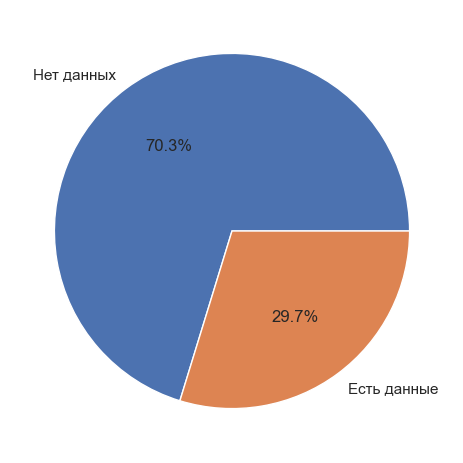

In [45]:
fig, ax = plt.subplots(layout = "tight")
parts = data["box_office"].apply(lambda x: not(np.isnan(x)))
parts = parts.value_counts()
ax.pie(parts, labels = ["Нет данных", "Есть данные"], autopct = "%1.1f%%")
pass

Фильмы с известными сборами составляют четверть выборки. Это не так мало, но стоит учитывать, что сделанные об этих фильмах выводы неточные из-за их малого количества (всего около 2000).

Посмотрим сколько фильмов ежегодно выходило в прокат для всего набора данных и для данных с известными сборами:

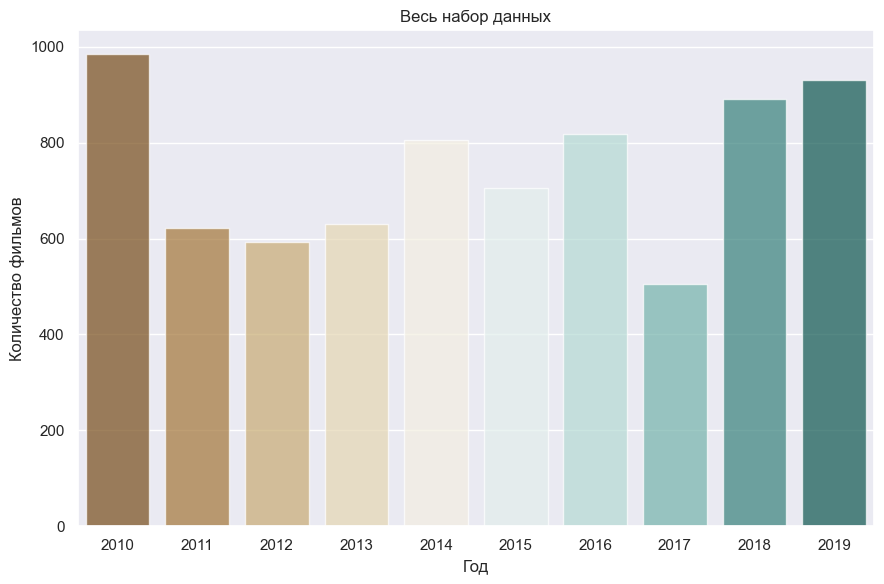

In [46]:
data_groupped = data.groupby("year").agg("count")
fig, ax = plt.subplots(layout = "tight", figsize = (9,6))
sns.barplot(data = data_groupped, x = data_groupped.index, y = "puNumber", ax = ax, palette = "BrBG", alpha = 0.7)
ax.set_title("Весь набор данных")
ax.xaxis.set_label_text("Год")
ax.yaxis.set_label_text("Количество фильмов")
pass

Видно, что в 2010 году в прокат вышло намного больше новых фильмов, чем в соседние года. Это можно объяснить тем, что минестерство культуры начало вести эту статистику и регистрировать фильмы в прокате, начиная с этого года, поэтому там присутствуют не только фильмы, выпущенные в этом году, но и старые фильмы, прошедшие проверку временем.
Также аномальным кажется значение 2017 года, ведь, елси верить Википедии, в этот год вышло даже больше новых фильмов, чем в соседние года. Возможно, информация собрана недостатнчно полно за этот период.

Также наблюдается увеличение количества фильмов в течении времени, что может означать две вещи:
1) Количество выпускаемых фильмов расет с каждым годом.
2) Инофрмацию о прокате в более поздние года собирать проще, поэтому данные собраны лучше.

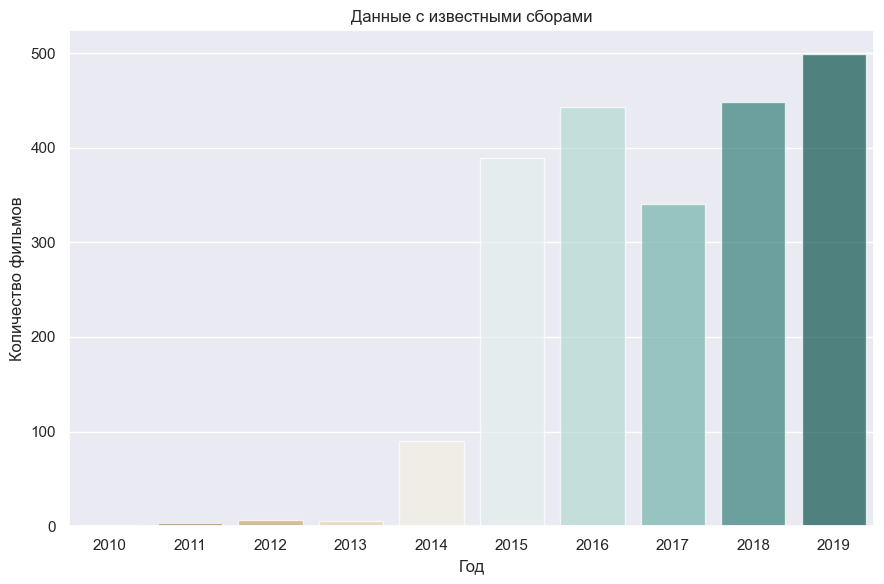

In [47]:
data_groupped = data.dropna(subset = "box_office").groupby("year").agg("count")
fig, ax = plt.subplots(layout = "tight", figsize = (9,6))
sns.barplot(data = data_groupped, x = data_groupped.index, y = "puNumber", ax = ax, palette = "BrBG", alpha = 0.7)
ax.set_title("Данные с известными сборами")
ax.xaxis.set_label_text("Год")
ax.yaxis.set_label_text("Количество фильмов")
pass

Можно сделать вывод, что для фильмов до 2015 года известно достаточно мало информаци, по сравнению с другими годами. Больше всего известно для фильмов 2016 и 2019 годов. В дальнейшем стоит рассматривать только фильмы 2015 - 2019 годов.

Рассмотрим как менялась динамика сборов по годам - построим сводную таблицу с информацией с различной информацией о сборах:

In [48]:
data_with_box = data.dropna(subset = "box_office").query('year >2014')
p_table = data_with_box.pivot_table(index = "year", values = "box_office",\
                                    aggfunc = [np.min, np.max, "mean", "median"])
p_table

,amin,amax,mean,median
,box_office,box_office,box_office,box_office
year,,,,
2015,250508.0,1.658861e+09,1.015234e+08,11011814.30
2016,253516.0,2.048126e+09,1.080387e+08,8139192.50
2017,263010.0,2.779686e+09,1.428282e+08,11574355.50
2018,279013.5,2.271754e+09,1.108586e+08,10732065.88
2019,264015.0,3.073569e+09,9.703841e+07,5356443.00


Визуализируем данные для большей наглядности:

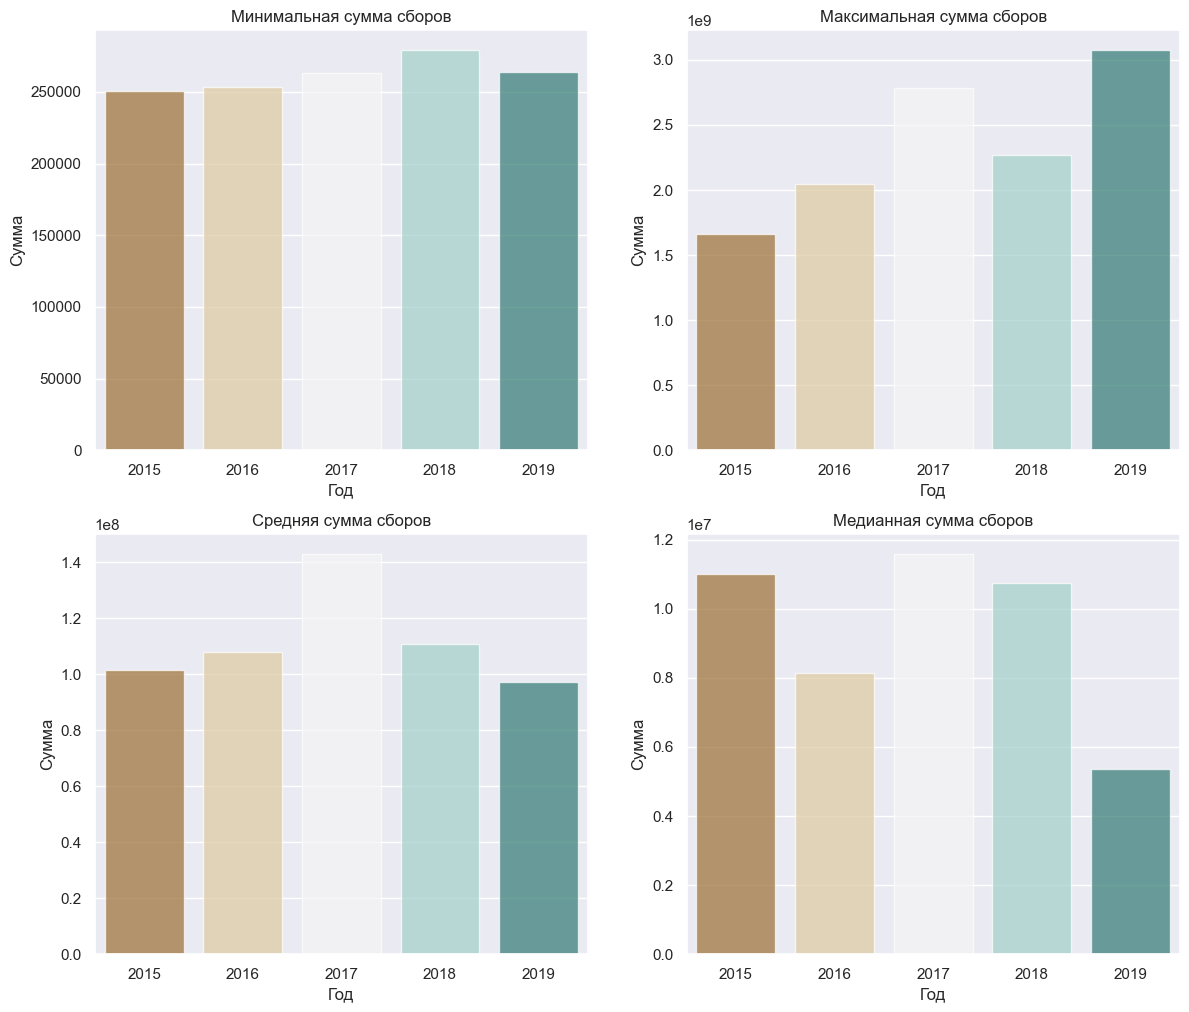

In [49]:
fig = plt.figure(figsize = (14,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.barplot(data = p_table, x = p_table.index, y = p_table.columns[0], ax = ax1, palette = "BrBG", alpha = 0.7)
ax1.set_title("Минимальная сумма сборов")
ax1.xaxis.set_label_text("Год")
ax1.yaxis.set_label_text("Сумма")

sns.barplot(data = p_table, x = p_table.index, y = p_table.columns[1], ax = ax2, palette = "BrBG", alpha = 0.7)
ax2.set_title("Максимальная сумма сборов")
ax2.xaxis.set_label_text("Год")
ax2.yaxis.set_label_text("Сумма")

sns.barplot(data = p_table, x = p_table.index, y = p_table.columns[2], ax = ax3, palette = "BrBG", alpha = 0.7)
ax3.set_title("Средняя сумма сборов")
ax3.xaxis.set_label_text("Год")
ax3.yaxis.set_label_text("Сумма")

sns.barplot(data = p_table, x = p_table.index, y = p_table.columns[3], ax = ax4, palette = "BrBG", alpha = 0.7)
ax4.set_title("Медианная сумма сборов")
ax4.xaxis.set_label_text("Год")
ax4.yaxis.set_label_text("Сумма")
pass

Среднее и медианное значение начинает падать с 2017 года. Это может быть связано с несколькими причинами:
1) Интерес к кино постепенно падает
2) Фильмы за 2018-2019 год ещё не успели собрать средства (данные были собраны в 2020 году)
3) Данных достаточно мало, поэтому появляются подобные аномалии
4) В 2017 году наблюдается провал в количестве выпущенных фильмов, это могло повлиять на интерес к кино.

Сложно выделить какой-то один из этих вариантов из-за недостатка информации.

Узнаем, влияет ли возрастное ограничение на сборы фильмов:

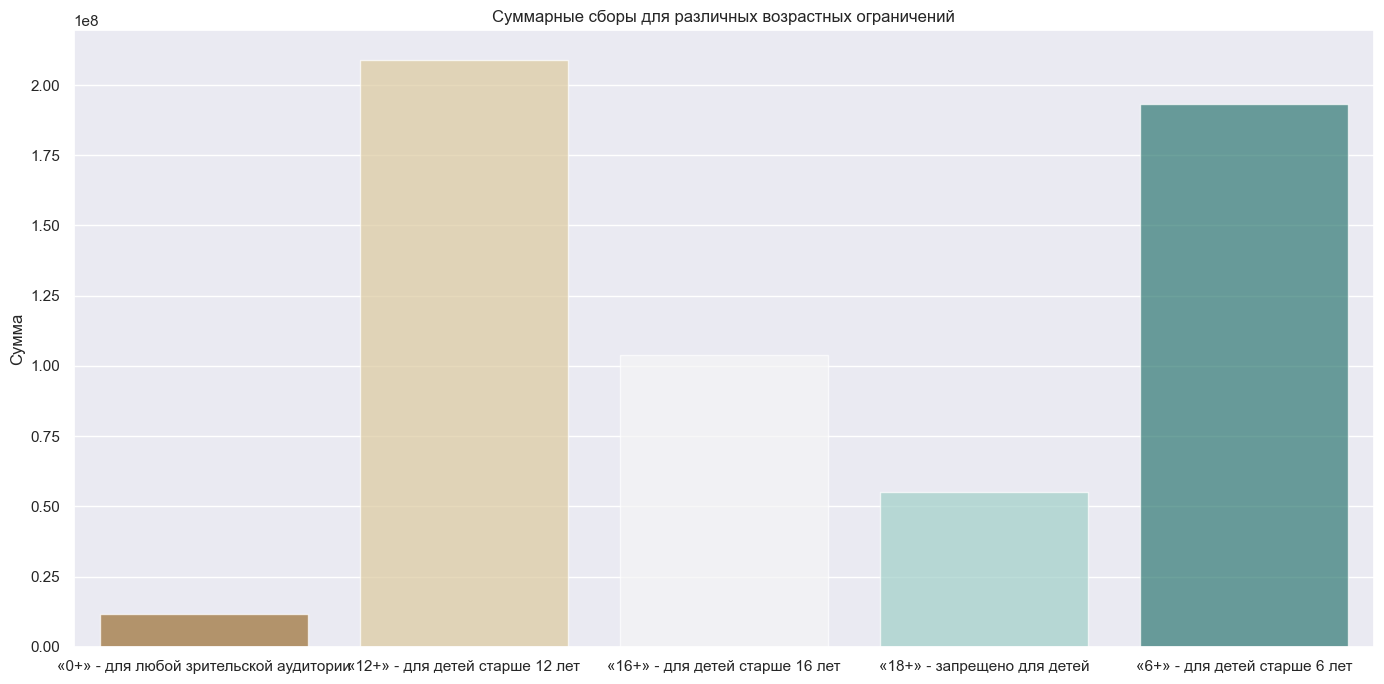

In [50]:
data_groupped = data_with_box[["box_office", "age_restriction"]].groupby("age_restriction").agg("mean")
fig, ax = plt.subplots(layout = "tight", figsize = (14,7))
sns.barplot(data = data_groupped, x = data_groupped.index, y = "box_office", ax = ax, palette = "BrBG", alpha = 0.7)
ax.set_title("Cуммарные сборы для различных возрастных ограничений")
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("Сумма")
pass

Больше всего в прокате собират фильмы с рейтингом 6+ 12+ и 16+. Это можно объяснить тем, что чаще всего в кино ходят дети или подростки.  

Изучим, менялись ли средние сборы по возрастным категориям в зависимости от года:

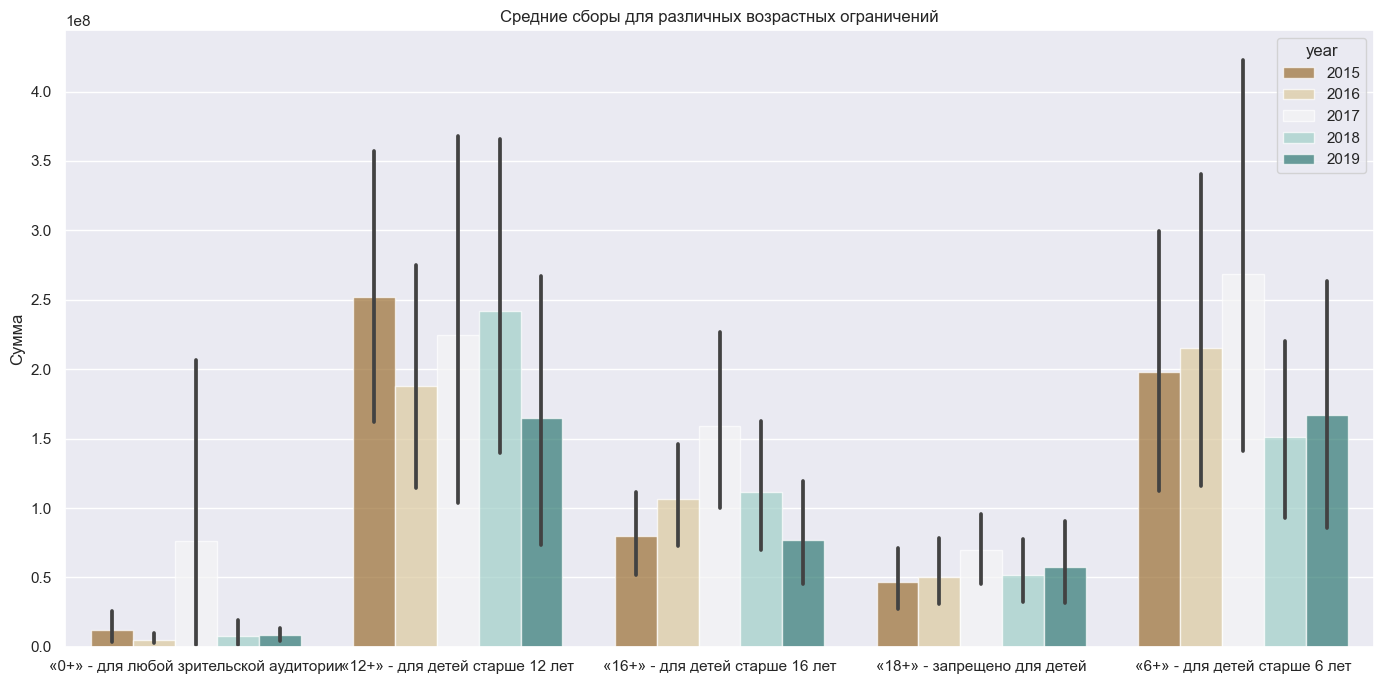

In [51]:
data_with_box
fig, ax = plt.subplots(layout = "tight", figsize = (14,7))
sns.barplot(data = data_with_box, x = "age_restriction", y = "box_office", hue = "year", ax = ax,\
            palette = "BrBG", alpha = 0.7)
ax.set_title("Средние сборы для различных возрастных ограничений")
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("Сумма")
pass

Видно, что какой-либо явной зависимости нет, при этом данные имеют огромный разброс, в связи с чем сложно дать какую-либо точную оценку. Рассмотрим количество данных в каждой из этих категорий.

In [52]:
p_table = data_with_box.pivot_table(index = "age_restriction", columns = "year", values = "box_office", aggfunc = "count")
p_table

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,31,30,3,4,2
«12+» - для детей старше 12 лет,54,65,35,59,77
«16+» - для детей старше 16 лет,143,156,118,148,166
«18+» - запрещено для детей,117,136,139,170,177
«6+» - для детей старше 6 лет,44,56,45,67,77


Данных очень мало, чего не хватает для статистической точности. Также разброс значений велик, что означает большую зашумленность даннх. Из-за этого нельзя объективно оценить полученный результат. 

## Изучение фильмов, получивших государственную поддержку

Выделим фильмы с государственной поддержкой:

In [53]:
data_gov_help = data.dropna(subset = "financing_source")

Для начала посмотрим какие есть источники финансирования:

In [54]:
data_gov_help["financing_source"].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Есть всего два источника финансирования. Посмотрим, кто из них больше спонсирует фильмы:

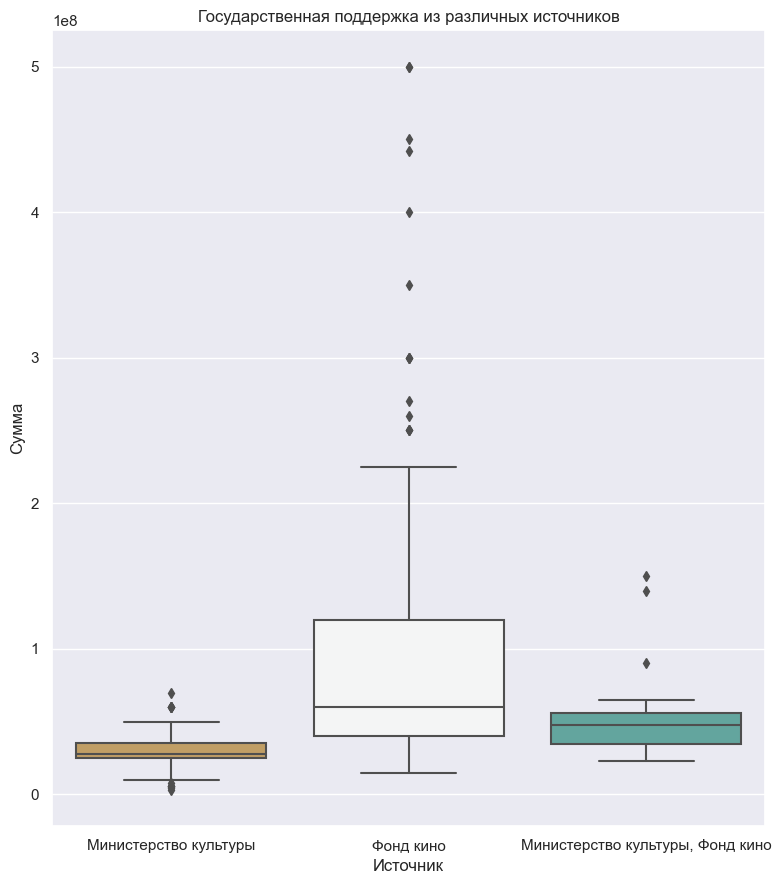

In [55]:
fig, ax = plt.subplots(layout = "tight", figsize = (8,9))
sns.boxplot(data = data_gov_help, x="financing_source", y="help_part", ax = ax, palette="BrBG")
ax.set_title("Государственная поддержка из различных источников")
ax.xaxis.set_label_text("Источник")
ax.yaxis.set_label_text("Сумма")
pass

Фонд кино оказывает гораздо большую поддержку, чем минестерство культуры. Также видно, что фонд кино спосировал несколько довольно крупных проектов. Посмотрим, что это за фильмы.

In [56]:
data_gov_help.query("help_part > 3e8")

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_producer,main_genre,help_part
2919,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"(ООО ""Студия ""ТРИТЭ"" Никиты Михалкова"",)","(Россия,)",Н.Лебедев,"(А.Златопольский, Л.Верещагин, Н.Михалков, ООО...",«6+» - для детей старше 6 лет,50000000.0,392104482.0,635283867.0,Фонд кино,7.6,"(драма, приключения, триллер)",1.402255e+09,2016,Л.Верещагин,драма,442104482.0
3350,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"(ООО ""Нон-Стоп Продакшн"",)","(Россия,)",А.Мизгирев,"(А.Роднянский, С.Мелькумов)",«16+» - для детей старше 16 лет,150000000.0,300000000.0,684200536.0,Фонд кино,6.6,"(драма,)",3.642851e+08,2016,А.Роднянский,драма,450000000.0
5568,Легенда о Коловрате,111007617,2017-11-30 12:00:00,Художественный,"(ООО ""Продюсерский центр ИВАН"",)","(Россия,)",И.Шурховецкий,"(АО ""Телекомпания"", ООО ""Централ Партнершип"")",«12+» - для детей старше 12 лет,100000000.0,250000000.0,500012729.0,Фонд кино,6.4,"(боевик, история, фэнтези)",5.904051e+08,2017,"ООО ""Централ Партнершип""",история,350000000.0
5652,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"(ООО ""Студия ""ТРИТЭ"" Никиты Михалкова"",)","(Россия,)",А.Мегердичев,"(А.Златопольский, Л.Верещагин, Н.Михалков, ООО...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"(драма, спорт)",2.779686e+09,2017,Л.Верещагин,спорт,400000000.0
7463,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"(ЗАО ""Дирекция кино"",)","(Россия,)",А.Кравчук,"(А.Максимов, К.Эрнст)",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"(биография, драма, история)",7.177032e+08,2019,А.Максимов,история,500000000.0
7473,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"(ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011"")","(Россия,)",Ф.Бондарчук,"(А.Андрющенко, Д.Рудовский, М.Врубель, Ф.Бонда...",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"(боевик, фантастика)",NaN,2019,Ф.Бондарчук,фантастика,500000000.0


Среди этих фильмов есть большие и известные, например: "Вторжение" или "Движение вверх"

Рассмотрим среднее количество возвратных и невозвратных средства поддержки:

In [57]:
p_table = data_gov_help.pivot_table(index = "financing_source", values = ["refundable_support","nonrefundable_support"], aggfunc = ["mean"])
p_table

mean                   
                                 nonrefundable_support refundable_support
financing_source                                                         
Министерство культуры                     2.949184e+07       0.000000e+00
Министерство культуры, Фонд кино          3.908779e+07       1.479545e+07
Фонд кино                                 7.236367e+07       2.475000e+07

Министерство культуры, в отличие от "фонда кино" всегда помощь деньги без возврата.

Узнаем, влияет ли поддержка фильмов на рейтинг, для этого сравним Рейтинг Русских фильмов без поддержки и с ней.

Подготовим таблицу:

In [58]:
def mask_func(val: tuple):
    if "Россия" not in val:
        return False
    return True

mask = data["production_country"].apply(mask_func)
data_tmp = data.loc[mask, :].copy()
data_tmp["is_help"] = data_tmp["financing_source"].apply(lambda x: "yes" if x in ['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'] else "no")

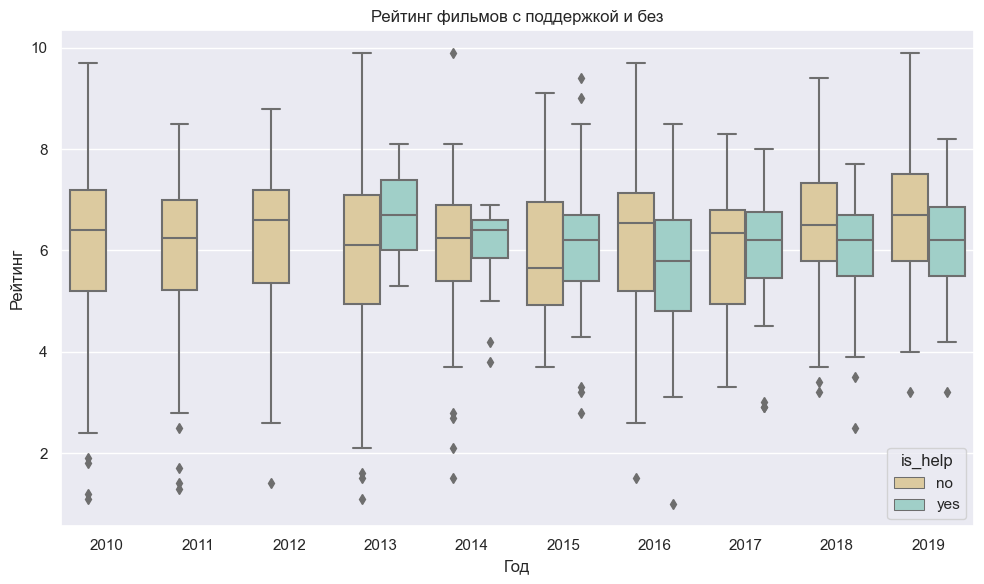

In [59]:
fig, ax = plt.subplots(layout = "tight", figsize = (10,6))
sns.boxplot(data = data_tmp, y = "ratings", x = "year", hue = "is_help", ax = ax, palette="BrBG")
ax.set_title("Рейтинг фильмов с поддержкой и без")
ax.xaxis.set_label_text("Год")
ax.yaxis.set_label_text("Рейтинг")
pass

С течением времени рейтинг у фильмов почти не меняется и остается в районе 6 баллов из 10. При этом фильмы с государственной поддержкой почти в среднем получают рейтинги меньше, чем без неё.

Проверим, меняется ли рейтинг в зависимости от количества помощи:

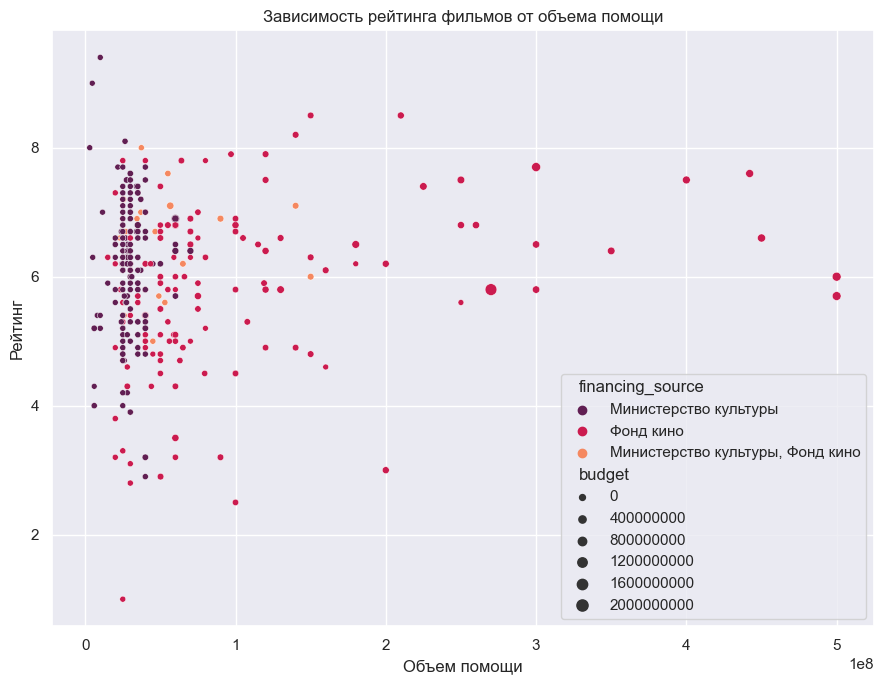

In [60]:
fig, ax = plt.subplots(layout = "tight", figsize = (9,7))
sns.scatterplot(data = data_gov_help, x = "help_part", y = "ratings", size = "budget",\
                ax = ax, palette="rocket", hue = "financing_source")
ax.set_title("Зависимость рейтинга фильмов от объема помощи")
ax.xaxis.set_label_text("Объем помощи")
ax.yaxis.set_label_text("Рейтинг")
pass

Из этого графика можно заметить, что есть фиксированные объемы выплат, что кажется логичным. Можно заметить, что среди "правой" части графика действительно почти нет фильмов с низким рейтингом, при этом в левой части много как фильмов с высоким рейтингом, так и фильмов с низким рейтингом. Также, можно заметить, у фильмов в правой части в среднем больше собственный бюджет. Можно сделать вывод, что либо государственная помощь действительно помогает снять более качественный фильм, либо большие деньги вкладываются только в потенциально рейтинговые фильмы. Скорее всего верно второе предположение, поскольку, как было сказано выше, в основном, у этих фильмов есть свой бюджет. Помимо этого, вкладывать настолько большие деньги в потенциально неудачные фильмы очень опасно, поэтому вряд ли так будут делать.

Узнаем, стали ли поддерживать фильмы больше с течением времени, для этого сделаем сводную таблицу:

In [61]:
data_tmp["is_help"] = data.query('year > 2012')["financing_source"].apply(lambda x: 1 if x in ['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'] else 0)
data_tmp["help_part"].fillna(0)
p_table = data_tmp.pivot_table(index = "year", values = ["is_help","help_part"], aggfunc = "mean")
p_table

,help_part,is_help
year,,
2013,6.717397e+07,0.024390
2014,3.575014e+07,0.112676
2015,4.251444e+07,0.417476
2016,7.054353e+07,0.312821
2017,7.765785e+07,0.305970
2018,6.155303e+07,0.112676
2019,7.005714e+07,0.205279


Визуализируем эти данные:

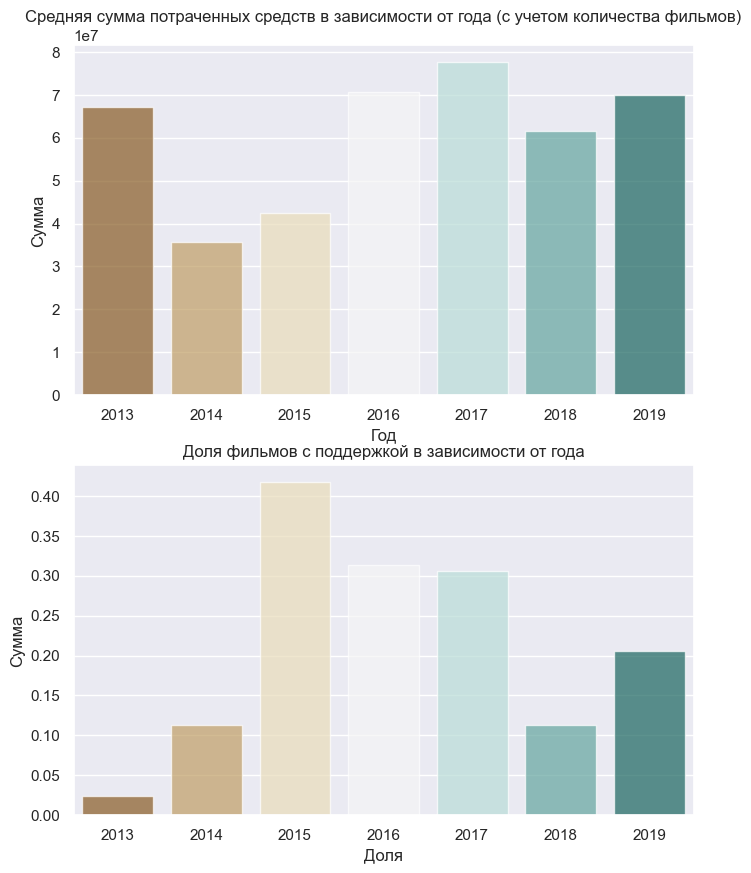

In [62]:
fig = plt.figure(figsize = (8,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(data = p_table, x = p_table.index,  y = "help_part", ax = ax1, palette = "BrBG", alpha = 0.7)

ax1.set_title("Средняя сумма потраченных средств в зависимости от года (с учетом количества фильмов)")
ax1.xaxis.set_label_text("Год")
ax1.yaxis.set_label_text("Сумма")

sns.barplot(data = p_table, x = p_table.index,  y = "is_help", ax = ax2, palette = "BrBG", alpha = 0.7)

ax2.set_title("Доля фильмов с поддержкой в зависимости от года")
ax2.xaxis.set_label_text("Доля")
ax2.yaxis.set_label_text("Сумма")
pass

Среднее количество вложенных в фильмы денег в целом растет. Видно два резких спада: первый в 2014 году, что может быть связано с валютным кризиом и в 2018 году, что тоже, весьма вероятно, является следствием какого-то кризиса. При этом доля фильмов, получивших поддержку, скорее падает. Это можно объясниь тем, что со временем государство стало вкладывать большее количество средств в меньшее количество фильмов, чтобы выпускать мало хороших, окупающихся фильмов, а не много плохих фильмов, которые не окупаются.

Посмотрим какие жанры и каких режисеров поддерживают больше:

In [63]:
p_table = data_gov_help.pivot_table(index = "main_producer", values = "help_part", aggfunc = ["sum", "count"])
data_tmp = p_table.sort_values(by = [( 'sum', 'help_part'),('count', 'help_part')], ascending = False )
data_tmp.columns = ["sum", "count"]
data_tmp.head()

,sum,count
main_producer,,
С.Сельянов,1.550000e+09,19
Т.Бекмамбетов,9.820000e+08,8
Л.Верещагин,8.421045e+08,2
Ф.Бондарчук,6.500000e+08,4
Э.Илоян,6.400000e+08,9


Есть много режиссеров, которых поддерживали неоднократно и в большом количестве. Большинство из них довольно известные и сняли большое количество хороших фильмов. Рассмотрим средний рейтинг этих режиссеров.

In [64]:
p_table = data.pivot_table(index = "main_producer", values = "ratings", aggfunc = "mean")
print("Средний рейтинг среди режиссеров: ",data_gov_help.pivot_table(index = "main_producer", values = "ratings", aggfunc = "mean").mean())
data_tmp.head().merge(p_table, on = "main_producer", how = "left")

Средний рейтинг среди режиссеров:  ratings    6.078524
dtype: float64


,sum,count,ratings
main_producer,,,
С.Сельянов,1.550000e+09,19,6.164865
Т.Бекмамбетов,9.820000e+08,8,6.105263
Л.Верещагин,8.421045e+08,2,7.575000
Ф.Бондарчук,6.500000e+08,4,5.620000
Э.Илоян,6.400000e+08,9,6.066667


Cредний рейтинг почти всех режиссеров близок к среднему рейтингу по всем режиссерам.

In [65]:
p_table = data_gov_help.pivot_table(index = "main_genre", values = "help_part", aggfunc = ["sum", "count"])
data_tmp = p_table.sort_values(by = [( 'sum', 'help_part'),('count', 'help_part')], ascending = False ).head()
data_tmp.columns = ["sum", "count"]
data_tmp

,sum,count
main_genre,,
драма,5.314407e+09,93
комедия,3.218283e+09,74
мультфильм,2.461520e+09,31
фантастика,1.406000e+09,11
фэнтези,1.032900e+09,11


Драмма, комедия и мультфильмы сильно опережают остальные жанры. Рассмотрим cредние рейтинги этих жанров:

In [66]:
p_table = data_gov_help.pivot_table(index = "main_genre", values = "ratings", aggfunc = "mean")
data_tmp.merge(p_table, on = "main_genre", how = "left")

,sum,count,ratings
main_genre,,,
драма,5.314407e+09,93,6.419355
комедия,3.218283e+09,74,5.514865
мультфильм,2.461520e+09,31,5.800000
фантастика,1.406000e+09,11,6.145455
фэнтези,1.032900e+09,11,6.090909


Видно, что средние рейтинги довольно низкие. Проверим, может ли это быть связано с тем, что было снято очень много фильмов одного жанра и это стало надоедать зрителю. Для этого рассмотрим комедии.

In [67]:
p_table = data_gov_help.query("main_genre == 'комедия'").pivot_table(index = "year", values = "ratings", aggfunc = "mean")
p_table

,ratings
year,
2013,5.300000
2014,5.850000
2015,5.445000
2016,5.246667
2017,5.642857
2018,5.677778
2019,5.646154


В целом средние рейтинги комедий остаются одинаковыми.

Рассмотри самые рейтинговые жанры:

In [68]:
p_table = data_gov_help.pivot_table(index = "main_genre", values = "ratings", aggfunc = "mean")
p_table.sort_values(by = "ratings", ascending = False ).head()

,ratings
main_genre,
криминал,7.500000
детский,7.125000
спорт,6.933333
биография,6.900000
детектив,6.760000


Их средний рейтинг выше тех, которые поддерживаются намного больше.

Узнаем, много ли фильмов, получивших поддержку, снималось совместо с дургими странами. Как это влияет на их рейтинг и какие страны встречаются чаще всего в совместных фильмах.

In [69]:
def mask_func(val: tuple):
    if len(val) < 2:
        return False
    return True

all_works_qv = data_gov_help.shape[0]
data
mask = data_gov_help["production_country"].apply(mask_func)
data_coop_works = data_gov_help.loc[mask, :].copy()
data_single_works = data_gov_help.loc[~mask, :].copy()
coop_works_qv =  data_coop_works.shape[0]
print("Доля совместных работ:", coop_works_qv/all_works_qv)

Доля совместных работ: 0.04819277108433735


Доля совемстных работ составляет всего около 5 процентов. Рассмотрим с какими странами чаще всего были совместные фильмы.

In [70]:
coop_info = dict()
def coop_counter(val: tuple):
    for country in val:
        if country == "Россия":
            continue
        if country not in coop_info:
            coop_info[country] = 1
        else:
            coop_info[country] += 1
    return val

data_coop_works["production_country"].apply(coop_counter)
print(sorted(coop_info.items(), key = lambda x: x[1], reverse = True)[:6])

[('Германия', 4), ('Латвия', 2), ('Украина', 2), ('Италия', 2), ('Польша', 2), ('Китай', 2)]


Лидером оказалась Германия, при этом стран СНГ в совместных проектах довольно мало. Узнаем, как совместное производство влияет на рейтинг:

In [71]:
print("Средний рейтинг совместных картин: ", data_coop_works["ratings"].mean())
print("Средний рейтинг фильмов, снятых без участия других стран: ", data_single_works["ratings"].mean())

Средний рейтинг совместных картин:  6.239999999999999
Средний рейтинг фильмов, снятых без участия других стран:  6.009966777408638


В целом, средний рейтинг почти не отличается. Из чего можно сделать вывод, что зрителю не сильно интереснее смотреть фильмы, снятые совместно с другими странами.

# Общий вывод

Данные о фильмах, предоставленных министерством культуры, оказаись довольно плохого качества. Много полезной информации (например: режиссеры или жанры) отсутствовало. Помимо этого в данных присутствовали неявные дубликаты и данные в некоторых столбцах были форматированы различным образом. Не смотря на это их набора данных можно было узнать много информации.

## Изучение данных с известными сборами

Информация о сборах была взята с "Кинопоиска". Большинство информации оказалосось непригодно для обработки, поскольку содержало в себе аномальные значения (например: нулевые). Фильмов с извстными сборами оказалось довольно мало, всего около 30 процентов от всего набора данных, что составляет всего около 2000 штук. Из-за такого маленького объема данных довольно сложно точно сделать какие-либо выводы. Из анализа можно сделать вывод, что максимальная сумма сборов с каждым годом растет, однако средняя, как и медианная, наоборот падает, начиная с 2017 года. Это может быть связано с несколькими факторами:

1) В 2017 году наблюдается сильный провал в количестве выпущенных фильмов, это могло отбить интерес к кино у зрителей.
2) Информация бралась за 2020 год, поэтому информация о 2019 годах и о 2018 может быть собрана не до конца.
3) Интерес к киноиндустрии падает со временем.

Довольно сложно выбрать один из этих вариантов, данных, имеющихся в распоряжении недостаточно для этого.
Анализ влияния возрастного ограничения на сборы показал, что больше всего в прокате собирают фильмы с возрастными ограниченями 6+ 12+ 16+, что кажется логичным, потому что именно этот возрастной срез является самым частым посетителем кинотеатров. Нельзя сказать, менялись ли сборы для различных рейтингов, в течение лет, поскольку данных слишком мало, поэтому разброс очень большой.

## Изучение фильмов, получивших государственную поддержку

Исходя из анализа фильмов с государственной поддержкой было выяснено, что "фонд кино" тратит больше денег на поддержку отечественного кино. Также "фонд кино" часто дает на поддержку крупные суммы, в отичие от минимстерства культуры, которое, в основном, поддерживает проекты на относительно небольшие суммы. При этом "фонд кино" часто дает деньги в поддержку с возвратом, чего никогда не делает министерство культуры. В целом и у обоих источнков финансирования примерно одинаковое количество выскоорейтинговых прокетов.
Анализ показал, что в среднем рейтинг фильмов, которые поддерживаются государством, меньше, чем фильмов без поддержки и этот рейтинг почти не меняется со временем. Это может быть связано с предвзятым отношением к фильмам с поддержкой или с неправильным выбором поддерживаемых проектов. Рассмотрение зависимости рейтинга от количества средств поддержки показал, что среди фильмов, которым была оказана большая поддержка, нет малорейтинговых. Скорее всего это связано с тем, что эти фильмы выбирались очень аккуратно, чтобы не потерять большую сумму денег, а не с тем, что поддержка способствует повышению рейтинга. Доказывается это ещё и тем, что почти у всех этих фильмов имеется также и свой бюджет и тем, что даже среди фильмов, сумма поддержки которых была относительно мала, довольно много фильмов с высоким рейтингом.
При анализе того, менялась ли поддержка от государства с течением времени, выяснилось, что общая сумма поддержки ежегодно растет (без учета кризисных годов), в то время как доля фильмов, которым оказывается поддержка падает. Это может свидетельствовать о том, что со временем государство стало вкладывать большее количество средств в меньшее количество фильмов, чтобы выпускать мало хороших, окупающихся фильмов, а не много плохих фильмов, которые не окупаются.
Были рассмотрены режисеры, которым оказывается наибольшая поддержка. Большинство из этих режисеров имеет довольно маленький рейтинг. Вполне возможно необходимо более тщательно рассматривать проекты для финансирования, поскольку среди всех режиссеров, которым была оказана поддержка, довольно много имеют высокий средний рейтинг.Были рассмотрены жанры, на поддержку которых выделялось наиболшее количество средств. В соновном это драммы и комедии. Однако средний рейтинг этих жанров не такой большой. Возможно стоит обратить внимание на поддержку других жанров (например: детективов), поскольку они явно имеют больший спрос среди зрителей.
Среди всех проектов, поддержанных государством, около 5 процентов составляют фильмы, снятые совместно с другими странами. При анализе таких фильмов, выяснилось, что в среднем они имеют такой же рейтинг, что и фильмы снятые без участия других стран, что может означать отсутсвие большей заинтересованности зрителей в таких фильмах.